In [2]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt

SEED = 2023
random.seed(SEED)
np.random.seed(SEED)

## Obtención de la datos en bruto

Para la obtención de los datos en bruto vamos a realizar la lectura del csv de los datos de entrenamiento y como dice el enunciado quedarnos con los atributos que se refieren a la zona 13, además de la variable objetivo y de los datos temporales

Tras esto mostraremos un resumen de los datos para analizarlos


In [3]:
data = pd.read_csv("wind_ava.csv")
#Esto quita todas las columnas que no terminan en .13
data = data.filter(regex='.*\.13|energy|datetime')
print("El tamaño del data set es:" ,data.shape)
data.describe(include='all')

El tamaño del data set es: (4748, 24)


,datetime,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
count,4748,4748.000000,4.748000e+03,4748.000000,4748.000000,4.748000e+03,4748.000000,4748.000000,4748.000000,4748.000000,...,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000
unique,4748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2005-01-02 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,693.126247,2.489477e+06,16.008810,31.166541,1.706692e+06,2.815222,2.576284,0.386215,0.120528,...,285.689253,286.663838,286.665988,0.074229,0.049971,286.668152,0.413677,-5.908467,0.447175,0.328204
std,NaN,665.531609,4.482599e+04,6.552216,121.758977,1.466953e+06,0.397377,0.116434,3.100583,3.016766,...,6.163483,5.547947,4.582827,0.367013,0.379014,3.552873,0.007602,0.094359,4.841730,4.667552
min,NaN,0.010000,2.358748e+06,1.650268,0.000000,5.610341e+04,2.323973,2.425866,-8.619823,-8.867441,...,268.970603,275.461648,278.389271,-1.714897,-1.438829,280.875389,0.364805,-6.130465,-11.879053,-13.043453
25%,NaN,144.170000,2.458543e+06,11.203264,0.000000,6.563209e+05,2.425944,2.461630,-1.950008,-2.050920,...,281.458939,282.287394,282.689506,-0.126880,-0.148495,283.405549,0.410027,-5.977599,-3.836853,-3.256194
50%,NaN,465.305000,2.490478e+06,15.543441,1.004148,1.239176e+06,2.758857,2.560520,0.048820,-0.191853,...,285.395453,286.191880,286.204914,0.010551,-0.003569,286.591659,0.410917,-5.947220,0.282399,-0.389416
75%,NaN,1089.375000,2.525134e+06,20.214077,14.143328,2.296548e+06,3.205385,2.688526,2.641779,2.016289,...,289.740438,291.345311,290.989045,0.232378,0.172325,290.024705,0.417070,-5.858848,4.187953,3.614395


In [4]:
data.dtypes

datetime       object
energy        float64
p54.162.13    float64
p55.162.13    float64
cape.13       float64
p59.162.13    float64
lai_lv.13     float64
lai_hv.13     float64
u10n.13       float64
v10n.13       float64
sp.13         float64
stl1.13       float64
u10.13        float64
v10.13        float64
t2m.13        float64
stl2.13       float64
stl3.13       float64
iews.13       float64
inss.13       float64
stl4.13       float64
fsr.13        float64
flsr.13       float64
u100.13       float64
v100.13       float64
dtype: object

### Análisis de los datos en bruto
Como podemos ver tenemos 4748 instancias con 24 propiedades

Además observamos que datetime por defecto es un objeto, por lo que lo más probable es que esté interpretando la fecha como un string. Para ello vamos a castear el string a un tipo datetime y añadiremos distintas columnas sobre el año, el mes, el día y la hora que nos permitan filtrar datos con más facilidad

In [5]:
data["datetime"] = pd.to_datetime(data["datetime"])
data["year"] = data["datetime"].dt.year
data["month"] = data["datetime"].dt.month
data["day"] = data["datetime"].dt.day
data["hour"] = data["datetime"].dt.hour
data.describe(include= "all")

,datetime,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,...,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13,year,month,day,hour
count,4748,4748.000000,4.748000e+03,4748.000000,4748.000000,4.748000e+03,4748.000000,4748.000000,4748.000000,4748.000000,...,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000
mean,2007-02-20 00:43:40.387531520,693.126247,2.489477e+06,16.008810,31.166541,1.706692e+06,2.815222,2.576284,0.386215,0.120528,...,0.049971,286.668152,0.413677,-5.908467,0.447175,0.328204,2006.628475,6.628054,15.652485,9.123842
min,2005-01-02 18:00:00,0.010000,2.358748e+06,1.650268,0.000000,5.610341e+04,2.323973,2.425866,-8.619823,-8.867441,...,-1.438829,280.875389,0.364805,-6.130465,-11.879053,-13.043453,2005.000000,1.000000,1.000000,0.000000
25%,2005-12-11 04:30:00,144.170000,2.458543e+06,11.203264,0.000000,6.563209e+05,2.425944,2.461630,-1.950008,-2.050920,...,-0.148495,283.405549,0.410027,-5.977599,-3.836853,-3.256194,2005.000000,4.000000,8.000000,6.000000
50%,2006-11-18 15:00:00,465.305000,2.490478e+06,15.543441,1.004148,1.239176e+06,2.758857,2.560520,0.048820,-0.191853,...,-0.003569,286.591659,0.410917,-5.947220,0.282399,-0.389416,2006.000000,7.000000,16.000000,12.000000
75%,2007-12-03 07:30:00,1089.375000,2.525134e+06,20.214077,14.143328,2.296548e+06,3.205385,2.688526,2.641779,2.016289,...,0.172325,290.024705,0.417070,-5.858848,4.187953,3.614395,2007.000000,10.000000,23.000000,18.000000
max,2009-12-31 18:00:00,2792.550000,2.580387e+06,39.230807,2311.662152,1.110694e+07,3.450745,2.762992,12.974802,11.699814,...,2.366522,292.808658,0.428914,-5.618172,18.964137,16.913033,2009.000000,12.000000,31.000000,18.000000
std,NaN,665.531609,4.482599e+04,6.552216,121.758977,1.466953e+06,0.397377,0.116434,3.100583,3.016766,...,0.379014,3.552873,0.007602,0.094359,4.841730,4.667552,1.414856,3.475914,8.844734,6.755085


> Ahora sí se calculan los datos numéricos de las fechas

## Visualización de la distribución de la variable objetivo
Para la correcta evaluación de la variable objetivo vamos a representar a través de un histograma y de diagrama de caja. 
- El histograma nos permite observar el número de veces que aparece un valor de la variable objetivo
- El diagrama de caja nos permite observar la existencia de valores atípicos


Text(0.5, 1.0, 'Distribución de la variable objetivo')

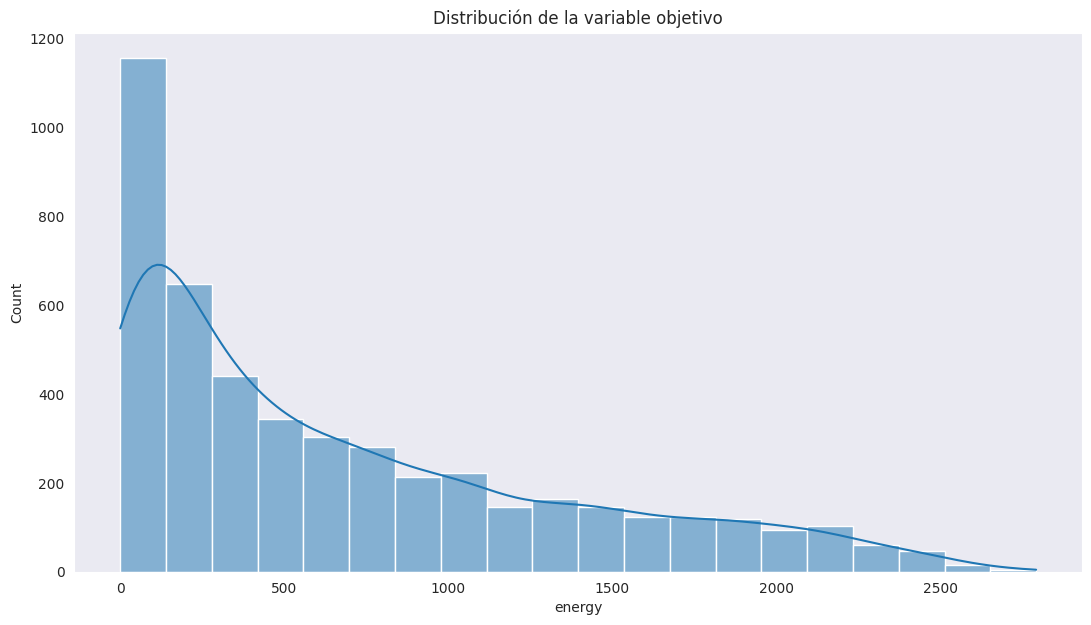

In [6]:
sns.set_style("dark")
plt.figure(figsize=(13,7))
sns.histplot(data.energy,kde = True, bins = 20)
plt.title("Distribución de la variable objetivo")


Text(0.5, 1.0, 'Diagrama de caja que muestra los valores atípicos')

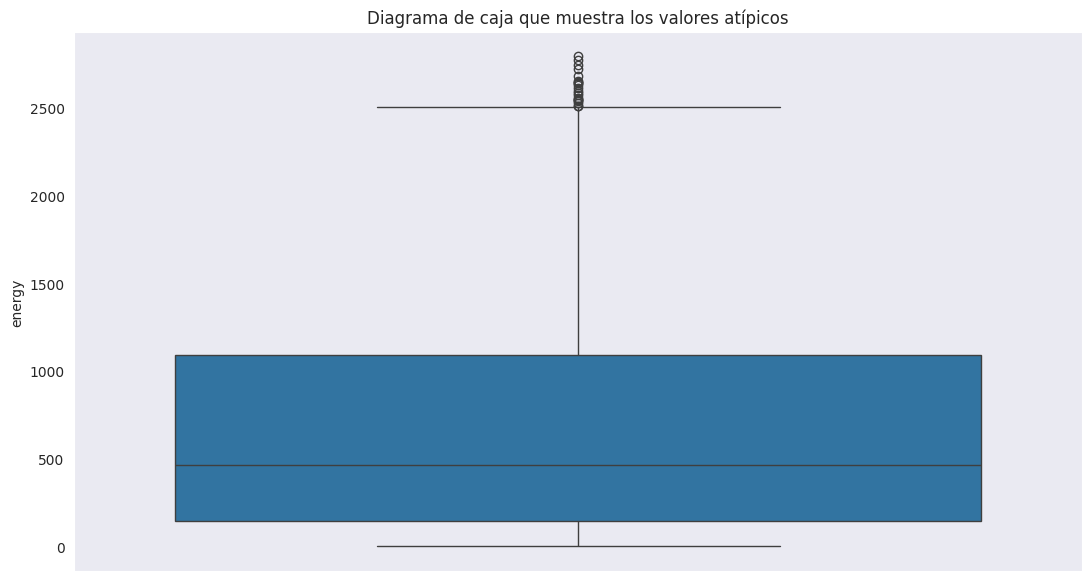

In [7]:
sns.set_style("dark")
plt.figure(figsize= (13,7))
sns.boxplot(data.energy)
plt.title("Diagrama de caja que muestra los valores atípicos")

Gracias al muestreo de los datos somos capaces de identificar que nuestros datos siguen una distribución geométrica y que tenemos diversos outliers.

A continuación trataremos de identificar la cantidad exacta de valores atípicos.

In [8]:
# Código para identificar valores atípicos

## Identificación/Búsqueda de valores faltantes y duplicados

Para seguir analizando los datos haremos incapie en los valores, más en concreto en la identificación de los valores faltantes y duplicados.

A continuación realizaremos una búsqueda de los valores faltantes

In [11]:
print(data.isnull().sum().any())
print(data.duplicated().any())

False
False
